##  Bases de Dados TITANIC


Hiury Gustavo Bezerra Fontes

In [114]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados
import statsmodels.api as sm

### Câncer de Mama

### Titanic

O dicionário de dados desta base pode ser encontrado [aqui]().

In [4]:
# Importando os dados sobre os passageiros do Titanic
titanic = pd.read_csv("titanic3.csv")

# Exibindo as primeiras linhas do dado
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [110]:
preditores = titanic [['pclass','sex','age','fare']]
#RELACIONEI CLASSE , SEXO , IDADE E RENDA.

In [28]:
alvo = titanic['survived']
#OBJETO EM QUESTÃO

In [30]:
preditores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null int64
sex       1309 non-null object
age       1046 non-null float64
fare      1308 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 41.0+ KB


In [36]:
print(preditores.isnull().sum())

#PARA SABER VALORES NAN

pclass      0
sex         0
age       263
fare        1
dtype: int64


In [48]:
preditores_mediana = preditores.fillna(preditores['age'].median())
#PARA SUBSTITUIR A MEDIAN POR VALORES NAN , PARA EVITAR OUTLIERS


In [123]:
print(preditores_mediana.isnull().sum())
#confirmando nao exister valores nam

pclass    0
sex       0
age       0
fare      0
dtype: int64


In [50]:
preditores_mediana

,pclass,sex,age,fare
0,1,female,29.00,211.3375
1,1,male,0.92,151.5500
2,1,female,2.00,151.5500
3,1,male,30.00,151.5500
4,1,female,25.00,151.5500
5,1,male,48.00,26.5500
6,1,female,63.00,77.9583
7,1,male,39.00,0.0000
8,1,female,53.00,51.4792
9,1,male,71.00,49.5042


In [101]:
# Divisão  treino e teste

preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores_mediana, alvo, test_size=0.70, random_state=0)

In [102]:
preditores_mediana['sex']=pd.get_dummies(preditores_mediana.sex)

#Para transformar sexo em valores binarios

In [103]:
preditores_mediana

,pclass,sex,age,fare
0,1,0,29.00,211.3375
1,1,1,0.92,151.5500
2,1,1,2.00,151.5500
3,1,1,30.00,151.5500
4,1,1,25.00,151.5500
5,1,1,48.00,26.5500
6,1,1,63.00,77.9583
7,1,1,39.00,0.0000
8,1,1,53.00,51.4792
9,1,1,71.00,49.5042


In [104]:
# Instancia o modelo de regressão logíst. com parâmet. default
modelo_reglog = LogisticRegression()

# Treina o modelo c/base nos predit. e alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, dados do conj. de test, result para alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[482  97]
 [183 155]]


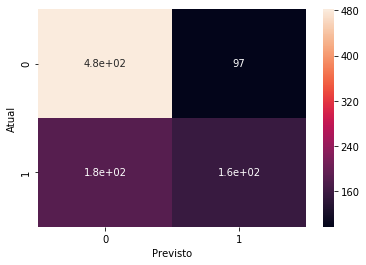

In [106]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [107]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

Acurácia:  0.6946564885496184


In [108]:
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Precisão:  0.6150793650793651
Revocação:  0.45857988165680474
F1-Measure:  0.5254237288135594
ROC AUC:  0.6455248285658808


In [109]:
print(alvo_teste)
print(alvo_pred)

1139    0
533     1
459     0
1150    0
393     0
1189    1
5       1
231     1
330     0
887     1
531     0
790     0
427     1
1260    1
251     1
486     0
436     1
31      1
186     1
1051    0
769     0
642     0
1087    0
55      1
678     0
358     1
503     1
995     0
1005    0
1279    0
       ..
680     0
904     0
3       0
134     1
837     0
355     1
292     1
698     0
1136    0
1116    0
1261    1
906     0
897     0
1010    0
228     0
643     1
225     0
226     0
842     0
369     0
1185    0
844     0
339     1
419     0
1123    1
603     1
1180    0
265     1
454     1
63      1
Name: survived, Length: 917, dtype: int64
[0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1

In [122]:
x_preditores=preditores_mediana[['pclass','sex','age','fare']]
x_preditores =sm.add_constant(x_preditores)

y_alvo=titanic.survived
model = sm.OLS(y_alvo, x_preditores).fit()
print(model.summary())

#Para obter informações em relação aos 4 preditores relacionados e a classe.

                            OLS Regression Results                            
Dep. Variable:               survived   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     50.55
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.33e-39
Time:                        12:32:01   Log-Likelihood:                -818.18
No. Observations:                1309   AIC:                             1646.
Df Residuals:                    1304   BIC:                             1672.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2128      0.461      2.633      0.0

### Crédito Bancário

Mais sobre esse dado pode ser visto [aqui](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Variáveis ​​de entrada:
# dados do cliente do banco:
1 - idade (numérica)
2 - trabalho 
3 - conjugal
4 - educação
5 - padrão
6 - habitação
7 - empréstimo
# relacionados ao último contato da campanha atual:
8 - contato: tipo de comunicação de contato 
9 - mês: mês do último contato do ano 
10 - day_of_week: último dia da semana do contato 
11 - duração: duração do último contato, em segundos (numérico). Nota importante: esse atributo afeta muito o destino de saída (por exemplo, se duration = 0, y = 'no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o final da chamada, y é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.
# outros atributos:
12 - campanha: número de contatos realizados durante esta campanha e para este cliente 
13 - dias: número de dias que passaram depois que o cliente foi contatado pela última vez em uma campanha anterior 
14 - anterior: número de contatos realizados antes desta campanha e para este cliente 
15 - poutcome: resultado da campanha de marketing anterior 
# atributos de contexto social e econômico
16 - emp.var.rate: taxa de variação do emprego - indicador trimestral 
17 - cons.price.idx: índice de preços ao consumidor - indicador mensal 
18 - cons.conf.idx: índice de confiança do consumidor - indicador mensal 
19 - euribor3m: taxa euribor a 3 meses - indicador diário 
20 - n.empregado: número de empregados - indicador trimestral

Variável de saída (destino desejado):
21 - y - o cliente assinou um depósito a prazo? (binário: 'sim', 'não')


In [5]:
# Importando os dados sobre os passageiros do Titanic
banking = pd.read_csv("banking.csv")

# Exibindo as primeiras linhas do dado
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
credit.describe()

,id,income,age,loan,credit
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
preditores()